In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
# Load the CO2 concentration data
df = pd.read_csv('../../data/processed/airport_cleaned.csv', parse_dates=['From Date'])
# df.drop("To Date", axis=1, inplace=True)
df

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,AT,HOUR,MONTH
0,2019-06-01 00:00:00,8.968447,12.179626,0.373962,13.710286,6.367238,17.086000,58.661489,59.723048,16.579524,76.262476,4.171932,21.877100,87.716774,1.227097,184.529677,27.810215,0,6
1,2019-06-01 01:00:00,9.016863,11.966923,0.349231,13.906923,5.444466,16.093861,51.717188,59.477379,15.399406,74.491359,4.104333,21.602857,87.869348,1.153152,187.873913,27.744130,1,6
2,2019-06-01 02:00:00,9.504804,12.471415,0.305619,13.750286,4.365825,15.659320,54.967634,56.430673,14.609010,70.510865,4.089186,21.700000,88.223226,1.124731,181.798710,27.602903,2,6
3,2019-06-01 03:00:00,9.895050,12.776481,0.294231,14.580286,2.354608,15.780962,53.554946,56.006408,13.140686,68.903107,4.638222,23.246042,88.747065,1.141848,176.929457,27.411304,3,6
4,2019-06-01 04:00:00,10.109903,13.154128,0.298302,14.143962,4.111058,14.980377,53.374362,58.782404,13.335400,71.507692,4.162989,21.476224,88.678602,1.128280,173.737204,27.353011,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33832,2023-04-10 16:00:00,16.350000,8.790000,1.340000,23.270000,0.000000,49.080000,237.620000,33.160000,65.450000,98.610000,2.951011,20.964353,55.900000,1.600000,298.920000,34.210000,16,4
33833,2023-04-10 17:00:00,15.030000,8.510000,1.500000,23.680000,0.000000,51.930000,219.950000,41.670000,67.010000,108.380000,2.466818,16.300814,56.030000,1.490000,299.100000,33.440000,17,4
33834,2023-04-10 18:00:00,14.860000,8.630000,1.480000,23.670000,0.000000,47.780000,205.440000,42.250000,62.510000,104.760000,2.497209,17.762558,60.160000,1.220000,298.160000,31.840000,18,4
33835,2023-04-10 19:00:00,14.690000,8.460000,1.430000,23.720000,0.000000,45.920000,185.990000,59.220000,59.860000,119.070000,2.693614,18.794824,68.800000,0.750000,279.810000,30.590000,19,4


In [4]:
# Convert the date column to a datetime object
df['From Date'] = pd.to_datetime(df['From Date'])

In [5]:
# Group the data by day and calculate the mean pollutant value
df = df.groupby(df['From Date'].dt.date).mean()

In [6]:
# Reset the index to make the date a column
daily_data = df.reset_index()

# Print the daily data
df

,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,AT,HOUR,MONTH
From Date,,,,,,,,,,,,,,,,,,
2019-06-01,10.744882,12.154786,0.329422,15.489369,7.117549,15.991063,57.592960,52.080472,17.474274,69.256862,4.008860,21.277209,82.606537,1.370089,203.150414,29.126388,11.5,6.0
2019-06-02,10.744882,12.154786,0.329422,15.489369,7.117549,15.991063,57.592960,52.080472,17.474274,69.256862,4.008860,21.277209,82.606537,1.370089,203.150414,29.126388,11.5,6.0
2019-06-03,10.744882,12.154786,0.329422,15.489369,7.117549,15.991063,57.592960,52.080472,17.474274,69.256862,4.008860,21.277209,82.606537,1.370089,203.150414,29.126388,11.5,6.0
2019-06-04,10.259972,9.886935,0.332388,13.230476,6.685216,15.353910,58.621232,47.849692,16.181885,63.766037,4.761387,21.181797,78.463418,1.256302,228.153829,30.024134,11.5,6.0
2019-06-05,10.744882,12.154786,0.329422,15.489369,7.117549,15.991063,57.592960,52.080472,17.474274,69.256862,4.008860,21.277209,82.606537,1.370089,203.150414,29.126388,11.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,15.395000,8.601250,1.430000,23.544167,4.960833,35.445833,150.774228,65.915417,33.360417,99.274167,4.797500,26.846575,68.649583,0.894167,234.280417,29.601667,11.5,4.0
2023-04-07,14.011667,8.567083,1.586667,23.585417,5.168750,48.565417,209.832978,66.292500,41.380417,107.673750,4.346667,33.874583,61.022083,0.916667,246.703750,30.497917,11.5,4.0
2023-04-08,16.215833,8.561667,2.382500,23.762917,2.957083,64.887917,203.220180,127.457500,46.355000,173.802917,4.130748,28.769643,62.123750,0.711250,200.408333,31.118750,11.5,4.0


In [97]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['PM10'].values.reshape(-1, 1))

In [98]:
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size,:], data[train_size:,:]

In [99]:
# Create the training and testing datasets
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [100]:

time_steps = 20
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [101]:
scaler.inverse_transform([y_train])

array([[ 83.51416667, 110.9375    ,  98.12458333, ..., 135.73625   ,
        156.29666667, 147.10291667]])

In [102]:
X_train.shape[1]

20

In [103]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)

In [104]:
# history= model.fit(X_train, y_train, epochs=40, batch_size=64, verbose=1)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
20/20 [==============================] - 3s 172ms/step - loss: 0.0120 - val_loss: 0.0127
Epoch 2/5
20/20 [==============================] - 4s 189ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 3/5
20/20 [==============================] - 4s 201ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 4/5
20/20 [==============================] - 4s 200ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 5/5
20/20 [==============================] - 3s 169ms/step - loss: 0.0050 - val_loss: 0.0055


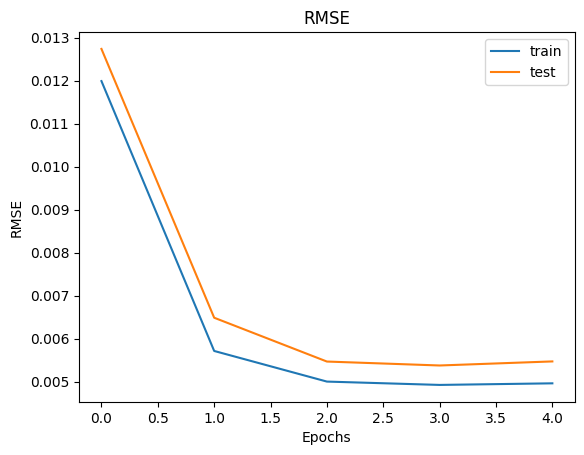

In [105]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [106]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5159, in <genexpr>
    output_ta_t = tuple(  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),
4/4 [==============================] - 0s 67ms/step


In [107]:
from sklearn.metrics import mean_squared_error


rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('RMSE of predicted PM10 model:', rmse)

RMSE of predicted PM10 model: 198.15647029259242


In [108]:
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

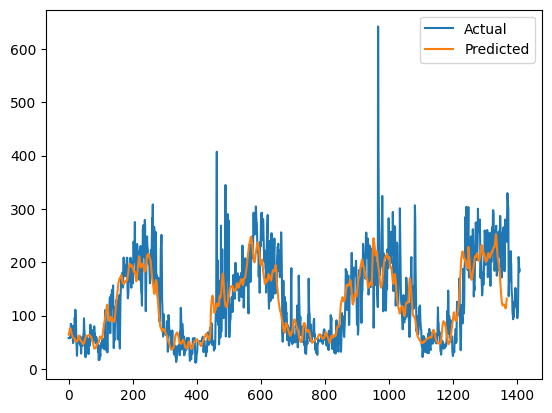

In [109]:
import matplotlib.pyplot as plt
plt.plot(df['PM10'].values, label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

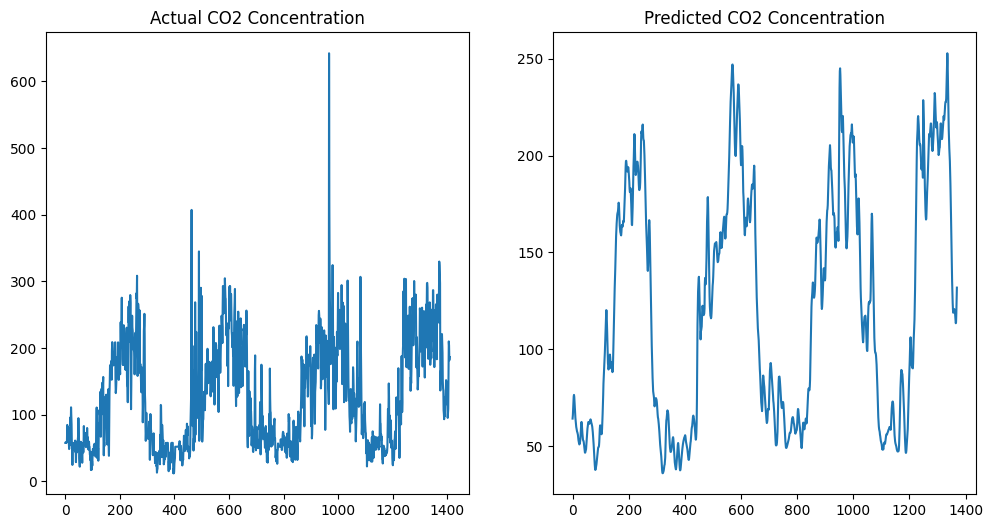

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(df['PM10'].values)
ax1.set_title('Actual CO2 Concentration')

ax2.plot(np.concatenate([train_predictions, test_predictions]))
ax2.set_title('Predicted CO2 Concentration')

plt.show()

In [111]:
# Number of future predictions to make
n_predictions = 100

# Use the last time_steps values from the test data as a starting point for predictions
x_input = test_data[-time_steps:].reshape((1, time_steps, 1))
x_input

array([[[0.17985956],
        [0.13555073],
        [0.16137348],
        [0.16237397],
        [0.17400304],
        [0.19306585],
        [0.22172752],
        [0.21779671],
        [0.17349251],
        [0.16646415],
        [0.18151805],
        [0.15050808],
        [0.13189363],
        [0.14307434],
        [0.15319831],
        [0.22025339],
        [0.31398758],
        [0.30349218],
        [0.26903199],
        [0.27683721]]])

In [112]:
# Make n_predictions using the model
predictions = []
for i in range(n_predictions):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0][0])
    x_input = np.append(x_input[:,1:,:], [[yhat[0]]], axis=1)

# Print the predicted values
print('Predicted values:', predictions)

Predicted values: [0.20048562, 0.2062122, 0.20933476, 0.2106868, 0.21093023, 0.2104361, 0.2094526, 0.20814274, 0.20667228, 0.20515436, 0.20355374, 0.20187713, 0.2002235, 0.19857094, 0.19688575, 0.19519368, 0.1934382, 0.19163659, 0.18996915, 0.1884281, 0.18691827, 0.18554784, 0.18415411, 0.18275855, 0.18137342, 0.18000537, 0.17865795, 0.17733303, 0.17603122, 0.17475265, 0.17349695, 0.17226392, 0.17105307, 0.169864, 0.16869621, 0.16754933, 0.16642298, 0.16531678, 0.16423038, 0.1631632, 0.16211466, 0.16108455, 0.16007248, 0.15907823, 0.15810159, 0.15714239, 0.15620014, 0.15527463, 0.1543656, 0.15347272, 0.15259567, 0.15173425, 0.15088816, 0.15005708, 0.14924079, 0.14843906, 0.14765158, 0.14687817, 0.14611849, 0.14537239, 0.14463954, 0.14391981, 0.14321291, 0.14251865, 0.14183676, 0.14116706, 0.14050934, 0.13986336, 0.13922895, 0.1386059, 0.13799395, 0.13739298, 0.13680279, 0.13622317, 0.13565393, 0.13509484, 0.13454585, 0.13400666, 0.13347715, 0.13295715, 0.13244645, 0.13194495, 0.1314524

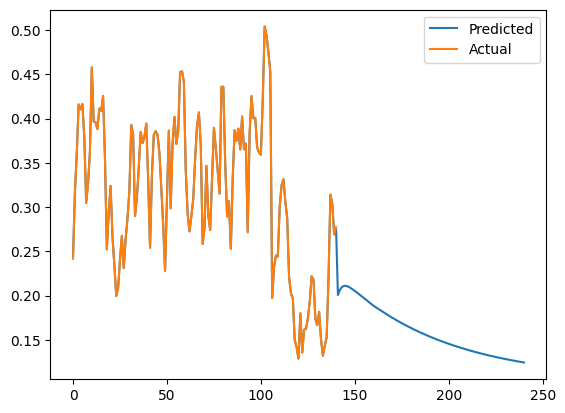

In [113]:
import matplotlib.pyplot as plt

# Combine the test data and predicted values
combined_data = np.concatenate((test_data, np.array(predictions).reshape(-1, 1)), axis=0)

# Plot the data
plt.plot(combined_data, label='Predicted')
plt.plot(test_data, label='Actual')
plt.legend()
plt.show()

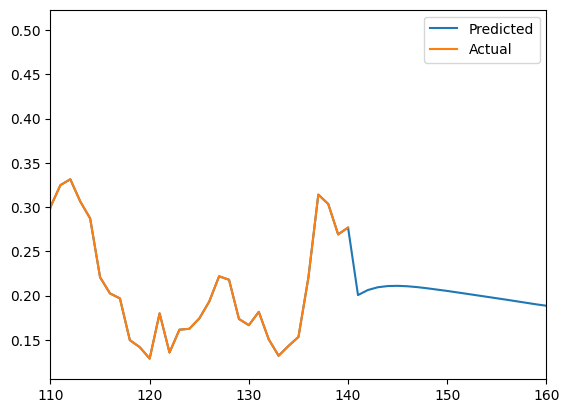

In [114]:
plt.plot(combined_data, label='Predicted')
plt.plot(test_data, label='Actual')
plt.xlim([110, 160])
plt.legend()
plt.show()